In [1]:
import os
import pickle
import pandas as pd
from tqdm import tqdm
from tools import read_hdfs
from slg import SemanticLogGraphModel
from logs_analysis_functions import LogAnalysis
from tools import visual_mean_dist_to_nbrs, find_long_alerts, calc_metrics

In [6]:
# Названия файлов и пути
path_to_train = "D:/Documents/РУДН/Учёба/Журнал MDPA/HDFS/train"
path_to_test = "D:/Documents/РУДН/Учёба/Журнал MDPA/HDFS/test"
path_to_model = "D:/Documents/РУДН/Учёба/Журнал MDPA/HDFS/model"
path_to_results = "D:/Documents/РУДН/Учёба/Журнал MDPA/HDFS/results"
path_to_train_semantic_model = "D:/Documents/УДН/Учёба/Журнал MDPA/HDFS/train_semantic_model"
path_to_semantic_model = "D:/Documents/РУДН/Учёба/Журнал MDPA/HDFS/semantic_model.pkl"
path_to_log_file = "D:/Documents/РУДН/Учёба/Журнал MDPA/HDFS/logging.log"
log_analysis_model_name = "log_analysis_model_3.json"
knn_model_name = "knn_model_3.pickle"
doc_vectors_name = "doc_vectors_3.csv"
test_score_file_name = "mean_distances_3.csv"

path_to_test_labels = "D:/Documents/РУДН/Учёба/Журнал MDPA/HDFS/test_labels.csv"

In [3]:
# Параметры
NLP_MODEL_NAME = "fasttext"
USE_WORDS_TFIDF = False
USE_LOGS_TFIDF = True
USE_LOGS_PATTERNS = False
TAGS_WEIGHTS = None
PATTERNS_WEIGHTS = None
TIME_INTERVAL = 1
VECTOR_SIZE = 100
WINDOW = 5
MIN_COUNT = 1
EPOCHS = 5
N_WORKERS = 6
N_NEAREST_NBRS = 7
QUANTILE_MEAN_DIST = 0.95
SAVE_TRAIN_INFO = True
SAVE_TEST_INFO = True

### Обучение семантической модели

In [4]:
# Получение списка файлов с логами из папки
path_to_train_sem_model_files = [os.path.join(path_to_train_semantic_model, file) for file in os.listdir(path_to_train_semantic_model) if \
                                 os.path.isfile(os.path.join(path_to_train_semantic_model, file))]

In [5]:
# Обучение семантической модели
semantic_model = SemanticLogGraphModel()
for file in path_to_train_sem_model_files:
    train = read_hdfs(file)
    semantic_model.fit(logfile=train)

100%|██████████| 5813455/5813455 [00:40<00:00, 142822.99it/s]


In [6]:
with open(path_to_semantic_model, "wb") as file:
    pickle.dump(semantic_model, file)

### Обучение модели

In [4]:
log_analysis = LogAnalysis(
    path_to_model=path_to_model,
    path_to_semantic_model=path_to_semantic_model,
    nlp_model_name=NLP_MODEL_NAME,
    use_words_tfidf=USE_WORDS_TFIDF,
    use_logs_tfidf=USE_LOGS_TFIDF,
    use_logs_patterns=USE_LOGS_PATTERNS,
    tags_weights=TAGS_WEIGHTS,
    patterns_weights=PATTERNS_WEIGHTS,
    vector_size=VECTOR_SIZE,
    window=WINDOW,
    min_count=MIN_COUNT,
    epochs=EPOCHS,
    time_interval=TIME_INTERVAL,
    n_workers=N_WORKERS,
    n_nearest_nbrs=N_NEAREST_NBRS,
    quantile_mean_dist=QUANTILE_MEAN_DIST,
    save_train_info=SAVE_TRAIN_INFO,
    log_file=path_to_log_file,
    log_analysis_model_name=log_analysis_model_name,
    knn_model_name=knn_model_name,
    doc_vectors_name=doc_vectors_name
)

2025-01-21 17:45:07,201 [LogAnalysis] <INFO> - Model parameter 'download_model' = False
2025-01-21 17:45:07,206 [LogAnalysis] <INFO> - Model parameter 'path_to_model' = D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis/HDFS/model
2025-01-21 17:45:07,208 [LogAnalysis] <INFO> - Model parameter 'log_analysis_model_name' = log_analysis_model_3.json
2025-01-21 17:45:07,209 [LogAnalysis] <INFO> - Model parameter 'path_to_semantic_model' = D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis/HDFS/semantic_model.pkl
2025-01-21 17:45:07,210 [LogAnalysis] <INFO> - Model parameter 'nlp_model_name' = fasttext
2025-01-21 17:45:07,210 [LogAnalysis] <INFO> - Model parameter 'use_words_tfidf' = False
2025-01-21 17:45:07,211 [LogAnalysis] <INFO> - Model parameter 'use_logs_tfidf' = True
2025-01-21 17:45:07,211 [LogAnalysis] <INFO> - Model parameter 'use_logs_patterns' = False
2025-01-21 17:45:07,212 [LogAnalysis] <INFO> - Model parameter 'tags_weights' = None
2025-01-21 17:45:07,212 [L

In [6]:
# Получение списка файлов с логами из папки
path_to_train_files = [os.path.join(path_to_train, file) for file in os.listdir(path_to_train) if \
                       os.path.isfile(os.path.join(path_to_train, file))]

In [5]:
# log_analysis.fit(path_to_files=path_to_train_files,
#                 #  path_to_pretrained_nlp_model=path_to_pretrained_nlp_model)
#                 )
log_analysis.fit(skip_fitting_nlp_model=True)
# log_analysis.fit(skip_calc_vectors=True)

2025-01-21 17:45:13,996 [LogAnalysis] <INFO> - Start train vectors calculation
2025-01-21 17:45:13,998 [LogVectorizer] <INFO> - Loading fasttext model from: D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis/HDFS/model\nlp_model\fasttext.model
2025-01-21 17:45:14,438 [LogVectorizer] <INFO> - Loading words idf dictionary from: D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis/HDFS/model\document_frequency\words_document_frequency.gz
2025-01-21 17:45:14,440 [LogVectorizer] <INFO> - Loading logs idf dictionary from: D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis/HDFS/model\document_frequency\logs_document_frequency.gz
2025-01-21 17:45:14,441 [LogVectorizer] <INFO> - Loading documents counter from: D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis/HDFS/model\document_frequency\documents_count.txt
2025-01-21 17:45:14,441 [LogVectorizer] <INFO> - Loading train bag of logs corpus from folder: D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis

100%|██████████| 1020/1020 [00:02<00:00, 377.58it/s]

2025-01-21 17:45:17,360 [LogVectorizer] <INFO> - Finished fasttext calculation, time: 2.71 sec
2025-01-21 17:45:17,360 [LogVectorizer] <INFO> - Loading logs counter from folder: D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis/HDFS/model\train_info
2025-01-21 17:45:17,368 [LogAnalysis] <INFO> - Finished train vectors calculation, time: 2.93 sec
2025-01-21 17:45:17,370 [LogAnalysis] <INFO> - Saving training vectors to folder: D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis/HDFS/model


2025-01-21 17:45:17,861 [LogAnalysis] <INFO> - Start calculating mean distances with KNN
2025-01-21 17:45:17,864 [LogAnalysis] <INFO> - Saving knn model to: D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis/HDFS/model\knn_model_3.pickle
2025-01-21 17:45:18,093 [LogAnalysis] <INFO> - Saving log analysis model to folder: D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis/HDFS/model


### Загрузка обученной модели

In [7]:
log_analysis_model_name = 'log_analysis_model_2.json'

In [8]:
log_analysis = LogAnalysis(download_model=True,
                           path_to_model=path_to_model,
                           path_to_semantic_model=path_to_semantic_model,
                           log_analysis_model_name=log_analysis_model_name,
                           log_file=path_to_log_file)

2025-06-20 18:34:59,028 [LogAnalysis] <INFO> - Loading log analysis model from: D:/Documents/РУДН/Учёба/Журнал MDPA/HDFS/model\log_analysis_model_2.json
2025-06-20 18:34:59,045 [LogAnalysis] <INFO> - Model parameter 'download_model' = True
2025-06-20 18:34:59,046 [LogAnalysis] <INFO> - Model parameter 'path_to_model' = D:/Documents/РУДН/Учёба/Журнал MDPA/HDFS/model
2025-06-20 18:34:59,048 [LogAnalysis] <INFO> - Model parameter 'log_analysis_model_name' = log_analysis_model_2.json
2025-06-20 18:34:59,048 [LogAnalysis] <INFO> - Model parameter 'path_to_semantic_model' = D:/Documents/РУДН/Учёба/Журнал MDPA/HDFS/semantic_model.pkl
2025-06-20 18:34:59,048 [LogAnalysis] <INFO> - Model parameter 'nlp_model_name' = fasttext
2025-06-20 18:34:59,049 [LogAnalysis] <INFO> - Model parameter 'use_words_tfidf' = True
2025-06-20 18:34:59,050 [LogAnalysis] <INFO> - Model parameter 'use_logs_tfidf' = False
2025-06-20 18:34:59,051 [LogAnalysis] <INFO> - Model parameter 'use_logs_patterns' = False
2025-06

### Инференс модели

In [7]:
# Получение списка файлов с логами из папки
path_to_test_files = [os.path.join(path_to_test, file) for file in os.listdir(path_to_test) if \
                      os.path.isfile(os.path.join(path_to_test, file))]

In [8]:
mean_distances_test = log_analysis.predict(path_to_results=path_to_results,
                                           path_to_files=path_to_test_files,
                                           save_test_info=SAVE_TEST_INFO)
# mean_distances_test, logs_importance_df = log_analysis.predict(path_to_results=path_to_results,
#                                                                skip_preprocessing=True, 
#                                                                calc_logs_importance=True,
#                                                                parallel_mode=True)
# mean_distances_test = log_analysis.predict(path_to_results=path_to_results, skip_preprocessing=True)
# mean_distances_test = log_analysis.predict(path_to_results=path_to_results, skip_calc_vectors=True)

2025-01-21 17:45:21,055 [LogAnalysis] <INFO> - Start inference for file: D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis/HDFS/test\HDFS test.log
2025-01-21 17:45:21,057 [LogAnalysis] <INFO> - Start reading log file: D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis/HDFS/test\HDFS test.log
2025-01-21 17:45:33,972 [LogAnalysis] <INFO> - Start preprocessing log file: D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis/HDFS/test\HDFS test.log


100%|██████████| 5362174/5362174 [00:21<00:00, 249495.50it/s]


2025-01-21 17:46:10,285 [LogAnalysis] <INFO> - Finished preprocessing log file, time: 36.31 sec
2025-01-21 17:46:10,286 [LogAnalysis] <INFO> - Using log analysis model: D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis/HDFS/model
2025-01-21 17:46:10,289 [LogVectorizer] <INFO> - Loading fasttext model from: D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis/HDFS/model\nlp_model\fasttext.model
2025-01-21 17:46:10,730 [LogVectorizer] <INFO> - Loading words idf dictionary from: D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis/HDFS/model\document_frequency\words_document_frequency.gz
2025-01-21 17:46:10,731 [LogVectorizer] <INFO> - Loading logs idf dictionary from: D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis/HDFS/model\document_frequency\logs_document_frequency.gz
2025-01-21 17:46:10,732 [LogVectorizer] <INFO> - Loading documents counter from: D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis/HDFS/model\document_frequency\documents_cou

100%|██████████| 676/676 [00:00<00:00, 801.01it/s] 

2025-01-21 17:46:47,754 [LogVectorizer] <INFO> - Finished fasttext calculation, time: 0.85 sec
2025-01-21 17:46:47,756 [LogAnalysis] <INFO> - Finished test vectors calculation, time: 37.02 sec


2025-01-21 17:46:48,467 [LogAnalysis] <INFO> - Saving bags of words and logs corpuses to folder: D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis/HDFS/results\test_info
2025-01-21 17:46:49,169 [LogAnalysis] <INFO> - Saving time intervals dictionary to: D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis/HDFS/results\time_intervals_dict.txt
2025-01-21 17:46:49,173 [LogAnalysis] <INFO> - Create new file with testing vectors: D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis/HDFS/results\doc_vectors_3.csv
2025-01-21 17:46:49,454 [LogAnalysis] <INFO> - Start calculating mean distances with KNN
2025-01-21 17:46:49,456 [LogAnalysis] <INFO> - Loading knn model from: D:/РУДН/Учёба/Журнал Pattern Recognition and Image Analysis/HDFS/model\knn_model_3.pickle


In [9]:
mean_distances_test.to_csv(os.path.join(path_to_results, test_score_file_name))

### Детекция аномалий

In [6]:
test_score_file_name = 'mean_distances_2.csv'

In [7]:
mean_distances_test = pd.read_csv(os.path.join(path_to_results, test_score_file_name), index_col=0, parse_dates=[0]).squeeze()

In [8]:
treshold_score = log_analysis.get_treshold_score()

In [53]:
# USE_WORDS_TFIDF = True
# USE_LOGS_TFIDF = True
visual_mean_dist_to_nbrs(log_analysis.mean_distances, treshold_score=treshold_score*0.27, window_width=10, min_condition=8, return_fig=False)

In [16]:
# USE_WORDS_TFIDF = True
# USE_LOGS_TFIDF = True
visual_mean_dist_to_nbrs(mean_distances_test, treshold_score=treshold_score*0.27, window_width=10, min_condition=8, return_fig=False)

In [59]:
# USE_WORDS_TFIDF = True
# USE_LOGS_TFIDF = False
visual_mean_dist_to_nbrs(log_analysis.mean_distances, treshold_score=treshold_score*0.22, window_width=10, min_condition=8, return_fig=False)

In [9]:
# USE_WORDS_TFIDF = True
# USE_LOGS_TFIDF = False
visual_mean_dist_to_nbrs(mean_distances_test, treshold_score=treshold_score*0.22, window_width=10, min_condition=8, return_fig=False)

In [65]:
# USE_WORDS_TFIDF = False
# USE_LOGS_TFIDF = True
visual_mean_dist_to_nbrs(log_analysis.mean_distances, treshold_score=treshold_score*0.21, window_width=10, min_condition=8, return_fig=False)

In [28]:
# USE_WORDS_TFIDF = False
# USE_LOGS_TFIDF = True
visual_mean_dist_to_nbrs(mean_distances_test, treshold_score=treshold_score*0.21, window_width=10, min_condition=8, return_fig=False)

In [9]:
test_true_labels = pd.read_csv(path_to_test_labels, index_col=0).squeeze()
test_true_labels.index = pd.to_datetime(test_true_labels.index)

In [10]:
test_pred_labels = pd.Series(0, index=mean_distances_test.index)
test_pred_labels.loc[find_long_alerts(mean_distances_test, treshold_score*0.21, 10, 8).index] = 1

# test_pred_labels = pd.Series(0, index=mean_distances_test.index)
# test_pred_labels[mean_distances_test > treshold_score*0.27] = 1

In [11]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=test_true_labels.index,
        y=test_true_labels.values,
        mode="lines",
        line_color="blue",
        line_width=2,
        opacity=0.4,
        name="True labels",
        showlegend=True,
    )
)
fig.add_trace(
    go.Scatter(
        x=test_pred_labels.index,
        y=test_pred_labels.values,
        mode="lines",
        line_color="green",
        line_width=2,
        opacity=0.8,
        name="Predicted labels",
        showlegend=True,
    )
)
fig.update_layout(
    title="Test results",
    yaxis_title="Number of logs",
    font=dict(size=24),
    legend=dict(orientation="h"),
)
fig.show()

FPR = 0.444, TPR = 0.932, ROC AUC = 0.718


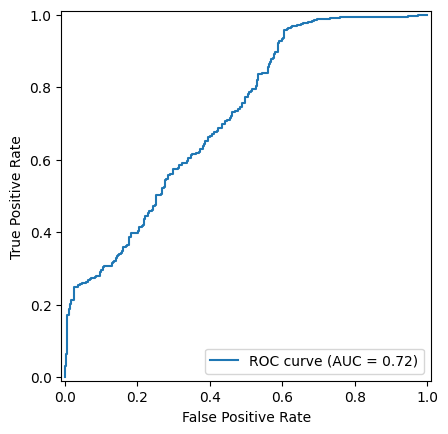

In [25]:
# USE_WORDS_TFIDF = True
# USE_LOGS_TFIDF = True
calc_metrics(test_true_labels.iloc[:-1], test_pred_labels, mean_distances_test)

FPR = 0.444, TPR = 0.982, ROC AUC = 0.811


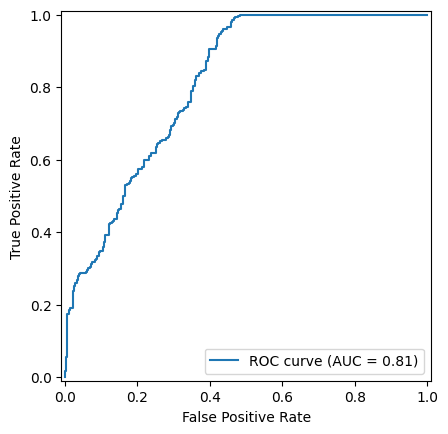

In [18]:
# USE_WORDS_TFIDF = True
# USE_LOGS_TFIDF = False
calc_metrics(test_true_labels.iloc[:-1], test_pred_labels, mean_distances_test)

FPR = 0.444, TPR = 0.960, ROC AUC = 0.761


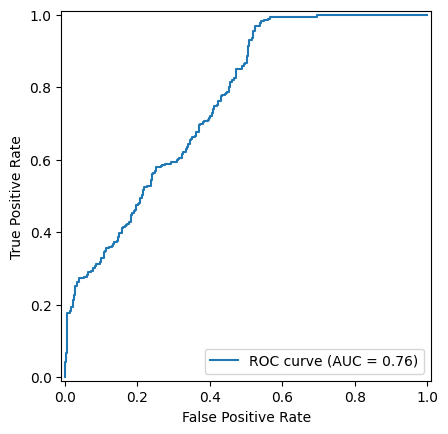

In [11]:
# USE_WORDS_TFIDF = False
# USE_LOGS_TFIDF = True
calc_metrics(test_true_labels.iloc[:-1], test_pred_labels, mean_distances_test)

### Другие методы детекции аномалий

In [9]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from autoencoder_model import AEModel

In [8]:
def calc_score_knn(train_doc_vectors: pd.DataFrame,
                   test_doc_vectors: pd.DataFrame,
                   n_nearest_nbrs: int = 7) -> pd.Series:
    nbrs = NearestNeighbors(n_neighbors=n_nearest_nbrs + 1).fit(train_doc_vectors.values)
    distances, _ = nbrs.kneighbors(test_doc_vectors.values)
    score = pd.Series(distances.mean(axis=1),
                      index=test_doc_vectors.index)
    return score

def calc_score_cov(train_doc_vectors: pd.DataFrame,
                   test_doc_vectors: pd.DataFrame,
                   prototype_num: int = 10000) -> pd.Series:
    if len(train_doc_vectors) > prototype_num:
        indexes = np.random.RandomState(42).choice(np.arange(len(train_doc_vectors)),
                                                   prototype_num,
                                                   replace=False)
        train_data = train_doc_vectors.iloc[indexes].values
    else:
        train_data = train_doc_vectors.values
    cov = EllipticEnvelope(random_state=42).fit(train_data)
    score = pd.Series(np.sqrt(cov.mahalanobis(test_doc_vectors.values)),
                      index=test_doc_vectors.index)
    return score

def calc_score_lof(train_doc_vectors: pd.DataFrame,
                   test_doc_vectors: pd.DataFrame) -> pd.Series:
    lof = LocalOutlierFactor(novelty=True).fit(train_doc_vectors.values)
    score = pd.Series(lof.score_samples(test_doc_vectors.values),
                      index=test_doc_vectors.index)
    return -score

def calc_score_iso(train_doc_vectors: pd.DataFrame,
                   test_doc_vectors: pd.DataFrame) -> pd.Series:
    iso = IsolationForest().fit(train_doc_vectors.values)
    score = pd.Series(iso.score_samples(test_doc_vectors.values),
                      index=test_doc_vectors.index)
    return -score

def calc_score_svm(train_doc_vectors: pd.DataFrame,
                   test_doc_vectors: pd.DataFrame,
                   prototype_num: int = 10000) -> pd.Series:
    if len(train_doc_vectors) > prototype_num:
        indexes = np.random.RandomState(42).choice(np.arange(len(train_doc_vectors)),
                                                   prototype_num,
                                                   replace=False)
        train_data = train_doc_vectors.iloc[indexes].values
    else:
        train_data = train_doc_vectors.values
    svm = OneClassSVM().fit(train_data)
    score = pd.Series(svm.score_samples(test_doc_vectors.values),
                        index=test_doc_vectors.index)
    return -score + score.max()

In [11]:
train_doc_vectors = pd.read_csv(os.path.join(path_to_model, 'doc_vectors_2.csv'), index_col=0, parse_dates=[0]).dropna().iloc[:, :VECTOR_SIZE]
test_doc_vectors = pd.read_csv(os.path.join(path_to_results, log_analysis.doc_vectors_name), index_col=0, parse_dates=[0]).dropna().iloc[:, :VECTOR_SIZE]

In [13]:
treshold_score = np.quantile(calc_score_knn(train_doc_vectors, train_doc_vectors), 0.8)

In [14]:
score = calc_score_knn(train_doc_vectors, test_doc_vectors)

In [ ]:
visual_mean_dist_to_nbrs(score, treshold_score=treshold_score, window_width=10, min_condition=8, return_fig=False)

Epoch: 10/500, training loss = 0.280807
Epoch: 20/500, training loss = 0.090348
Epoch: 30/500, training loss = 0.014745
Epoch: 40/500, training loss = 0.009145
Epoch: 50/500, training loss = 0.010421
Epoch: 60/500, training loss = 0.006444
Epoch: 70/500, training loss = 0.009359
Epoch: 80/500, training loss = 0.004338
Epoch: 90/500, training loss = 0.007460
Epoch: 100/500, training loss = 0.003865
Epoch: 110/500, training loss = 0.002755
Epoch: 120/500, training loss = 0.002441
Epoch: 130/500, training loss = 0.002608
Epoch: 140/500, training loss = 0.008677
Epoch: 150/500, training loss = 0.002773
Epoch: 160/500, training loss = 0.002859
Epoch: 170/500, training loss = 0.002724
Epoch: 180/500, training loss = 0.001128
Epoch: 190/500, training loss = 0.002235
Epoch: 200/500, training loss = 0.001317
Epoch: 210/500, training loss = 0.001487
Epoch: 220/500, training loss = 0.000849
Epoch: 230/500, training loss = 0.000738
Epoch: 240/500, training loss = 0.001679
Epoch: 250/500, training 

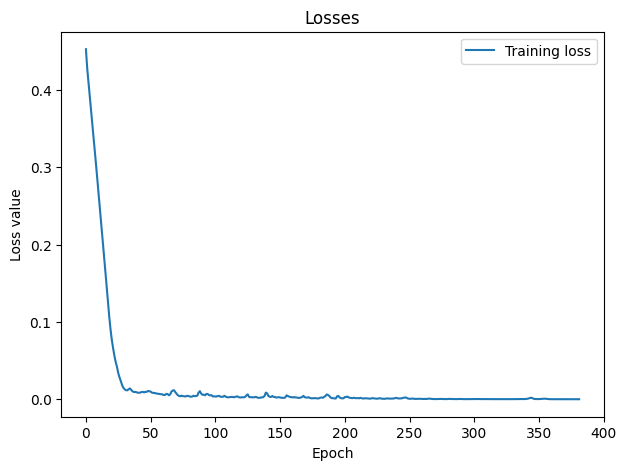

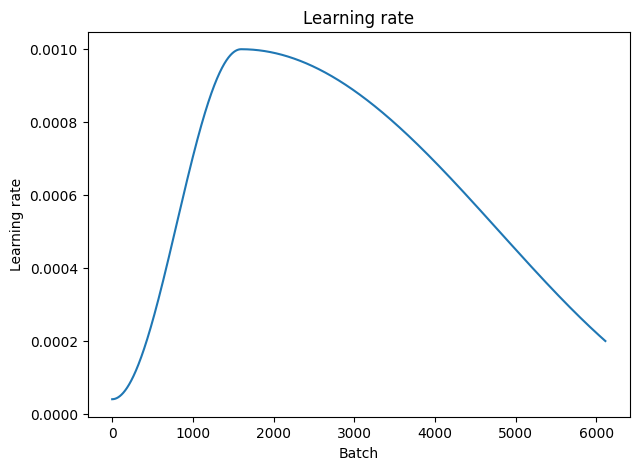

Final training loss = 9.730171319688452e-05


In [ ]:
ae_model = AEModel(method="simple_ae", n_features=100, encoder_sizes=[128, 64, 32, 16])
ae_model.fit(train_doc_vectors, eps_early_stop=1e-6, verbose=True)

In [13]:
treshold_score = np.quantile(ae_model.predict(train_doc_vectors, return_health_index=True)['health_index'], 0.85)
score = ae_model.predict(test_doc_vectors, return_health_index=True)['health_index']

In [14]:
visual_mean_dist_to_nbrs(score, treshold_score=treshold_score, window_width=10, min_condition=8, return_fig=False)